In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

from utils import get_random_spectra

In [3]:
np.repeat(np.random.randint(30, 250, 4), 3)

array([ 46,  46,  46, 194, 194, 194,  75,  75,  75, 240, 240, 240])

In [14]:
np.logspace(0, 4, 20, dtype=int)[5:]

array([   11,    18,    29,    48,    78,   127,   206,   335,   545,
         885,  1438,  2335,  3792,  6158, 10000])

In [47]:
# nmut = 1000

data = []
spectra = []
for nmut in np.logspace(0, 4, 20, dtype=int)[5:]:
    ms12raw = get_random_spectra(1).rename(columns={'MutSpec': 'MutSpecInit'})
    nuc_cont = np.repeat(np.random.randint(30, 250, 4), 3)
    ms12 = ms12raw.copy()
    ms12['ExpNum'] = nuc_cont
    ms12['ObsNum'] = ms12['MutSpecInit'] * ms12['ExpNum']
    ms12['ObsNum'] = (ms12['ObsNum']/ms12['ObsNum'].sum() * nmut)
    ms12['MutSpec'] = ms12['ObsNum'] / ms12['ExpNum']
    ms12['MutSpec'] /= ms12['MutSpec'].sum()
    ms12['Rate'] = (ms12['ObsNum'] / ms12['ObsNum'].sum()) / (ms12['ExpNum'] / ms12['ExpNum'].sum())
    spectra.append(ms12.assign(nmut=nmut))

    scaler_ms = (ms12['ObsNum'] / ms12['ExpNum']).sum()
    scaler_rate = ms12['ObsNum'].sum() / ms12['ExpNum'].sum()

    cossim = 1 - cosine(ms12['Rate'], ms12['MutSpec'])
    diff = ms12['MutSpec'] - (ms12['Rate'] / ms12['Rate'].sum())

    ms_cttc = ms12.query('Mut == "C>T"').MutSpec.item() / ms12.query('Mut == "T>C"').MutSpec.item()
    rate_cttc = ms12.query('Mut == "C>T"').Rate.item() / ms12.query('Mut == "T>C"').Rate.item()
    
    data.append({
        'nmut': nmut,
        'scaler_ms': scaler_ms,
        'scaler_rate': scaler_rate,
        'cossim': cossim,
        'diff': diff.sum(),
        'ms_cttc': ms_cttc,
        'rate_cttc': rate_cttc,
    })
    # break
df = pd.DataFrame(data)
spectra = pd.concat(spectra)

df

,nmut,scaler_ms,scaler_rate,cossim,diff,ms_cttc,rate_cttc
0,11,0.057524,0.005530,1.0,-8.500145e-17,42.564481,42.564481
1,18,0.132909,0.010067,1.0,3.469447e-18,3.769403,3.769403
2,29,0.229115,0.019450,1.0,-2.949030e-17,1.243674,1.243674
3,48,0.255267,0.021477,1.0,-7.892992e-17,2.252709,2.252709
4,78,0.553055,0.043771,1.0,-4.380177e-17,0.053885,0.053885
5,127,0.800369,0.062716,1.0,-1.822002e-16,0.280944,0.280944
6,206,1.816363,0.176068,1.0,1.734723e-17,0.676042,0.676042
7,335,1.822568,0.152342,1.0,-3.642919e-16,1.045843,1.045843
8,545,4.318956,0.408240,1.0,-1.353084e-16,1.777980,1.777980
9,885,7.791986,0.623679,1.0,-3.729655e-17,1.065129,1.065129


<Axes: xlabel='scaler_ms', ylabel='scaler_rate'>

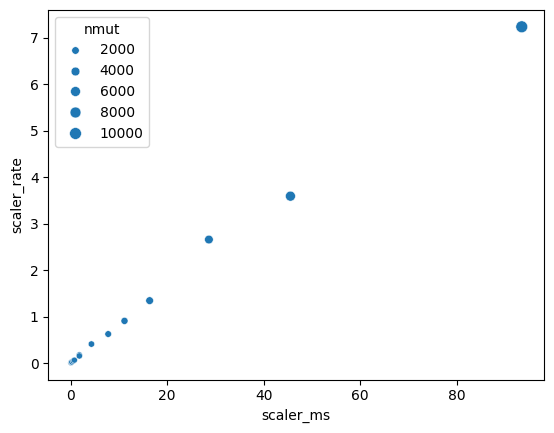

In [48]:
sns.scatterplot(data=df, x='scaler_ms', y='scaler_rate', size='nmut')
# plt.xscale('log')
# plt.yscale('log')

In [59]:
spectra.pivot(index='nmut', columns='Mut', values='Rate')

Mut,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G
nmut,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,0.140683,3.657770,0.070342,0.123684,0.123684,3.463158,1.224091,0.153011,0.153011,0.000000,0.000000,0.000000
200,0.137783,3.582352,0.103337,0.121134,0.121134,3.391753,1.198852,0.224785,0.149857,0.173049,0.173049,0.000000
300,0.136842,3.557899,0.114035,0.120307,0.160410,3.368601,1.190669,0.198445,0.148834,0.229157,0.229157,0.000000
400,0.152259,3.518867,0.118423,0.148734,0.148734,3.331646,1.177607,0.220801,0.147201,0.254973,0.254973,0.084991
...,...,...,...,...,...,...,...,...,...,...,...,...
9600,0.154613,3.489925,0.130237,0.154299,0.164096,3.302736,1.165008,0.222700,0.157556,0.311397,0.297402,0.083972
9700,0.155102,3.490130,0.130285,0.153935,0.164844,3.302945,1.165106,0.221925,0.157447,0.311680,0.294365,0.083115
9800,0.154898,3.490330,0.130333,0.154779,0.164378,3.303150,1.165202,0.222650,0.157339,0.308529,0.294817,0.082275


In [36]:
spectra.pivot(index='nmut', columns='Mut', values='Rate').reset_index().corr().loc['nmut']

Mut
nmut    1.000000
A>C     0.235632
A>G    -0.200449
A>T     0.631090
C>A     0.450644
C>G    -0.196764
C>T     0.313701
G>A     0.029678
G>C     0.093466
G>T     0.575245
T>A     0.190908
T>C    -0.265956
T>G     0.223313
Name: nmut, dtype: float64

In [24]:
spectra.pivot(index='nmut', columns='Mut', values='MutSpec').reset_index().corr().loc['nmut']

Mut
nmut    1.000000
A>C    -0.482423
A>G    -0.389583
A>T    -0.306026
C>A     0.022652
C>G    -0.011382
C>T     0.026050
G>A    -0.353502
G>C     0.458821
G>T    -0.329105
T>A     0.102959
T>C    -0.500813
T>G    -0.354972
Name: nmut, dtype: float64